In [1]:
import openmc.deplete as dpl
import openmc.data as data
import openmc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
results = dpl.results.Results('20kp_50i_150b/depletion_results.h5')
materials = results.export_to_materials(12,path = '20kp_50i_150b/materials.xml')

<ErrorbarContainer object of 3 artists>

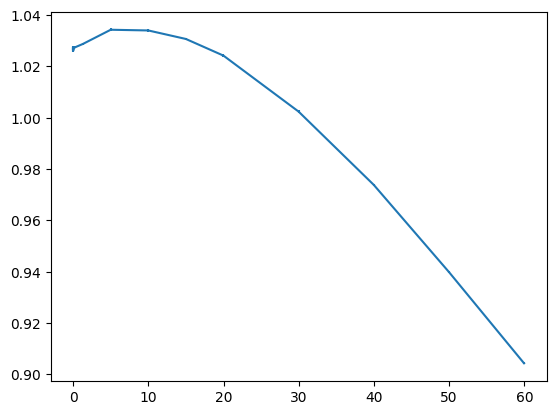

In [3]:
t, k_ = results.get_keff('a')
k_eff, err = list(zip(*k_))
plt.errorbar(t, k_eff, err)

In [4]:
mat_mass = [0]*3
nuc_mass = {}
time_step = results.get_step_where(20,'a')


for mat in materials[:3]:
    for nuc, per, _ in mat.nuclides:
        time, mass = results.get_mass(str(mat.id), nuc, mass_units='kg', time_units='a')
        mat_mass[mat.id-1] += mass[time_step]

        try:
            nuc_mass[nuc] += mass[time_step]

        except:
            nuc_mass[nuc] = mass[time_step]

total_mass = sum(mat_mass)
material = openmc.Material()
for nuc, mass in nuc_mass.items():
    material.add_nuclide(nuc, mass / total_mass, 'wo')
    
material.volume = 1.0
material.set_density('g/cm3', total_mass*1e3)

SNF_MATERIAL = openmc.Materials([material])
SNF_MATERIAL.export_to_xml('spent_single_fuel.xml')

# Evaluation Criteria

## Nuclear Waste Management Criterion 

In [40]:
SNF_MASS = (total_mass /1e3)
GWh_e = .1 # 100 MWe
GWe_YEAR = GWh_e * 24 * 365
MASS_SNF_PER_ENERGY = SNF_MASS / GWe_YEAR

## Activity is done in activty_at_ depletion...

pu_mass = {}
u_mass = {}
for i in range(2, 246):
    k = 'Pu' + str(i)
    if k in nuc_mass.keys():
        pu_mass[k] = nuc_mass[k]

    k = 'U' + str(i)
    if k in nuc_mass.keys():
        u_mass[k] = nuc_mass[k]

DU_RU_RTh = sum(u_mass.values()) / 1e3
DU_RU_RTh_PER_ENERGY = DU_RU_RTh / GWe_YEAR

#TABLE C-1.12
LLW_PROCESS = 56
GTCC_PROCESS = 2.6
LLW_DD = 205
GTCC_DD = 15

LLW_PRODUCTION = np.array([LLW_PROCESS, LLW_DD]) * GWe_YEAR #m3... this has to be wrong
GTCC_PRODUCTION = np.array([GTCC_PROCESS, GTCC_DD]) * GWe_YEAR
sum(LLW_PRODUCTION), sum(GTCC_PRODUCTION)

(np.float64(228636.00000000003), np.float64(15417.600000000002))

# Proliferation

In [20]:
# SQ from page 35  https://www.iaea.org/sites/default/files/iaea_safeguards_glossary.pdf

#Plutonium is a direct use material, if less than 20% Pu238
MASS_PU = sum(pu_mass.values())
ENRICHMENT_PU239 = pu_mass['Pu239'] / MASS_PU
ENRICHMENT_PU238 = pu_mass['Pu238'] / MASS_PU
SQ_PU = 8.0
NUM_SQ_PU = MASS_PU / SQ_PU


#Uranium is a direct use material

MASS_U = sum(u_mass.values())
ENRICHMENT_U235 = u_mass['U235'] / MASS_U
SQ_U = 75 #kg U235 in <20% enriched uranium
NUM_SQ_U = u_mass['U235'] / SQ_U

# Nuclear Material Security Risk Criterion

In [21]:
#activity at 10 years of SNF

# Safety Criterion

In [22]:
# for eg2 -> likely safer that current, but hard to say, much less waste so safer, but higher enrichment...

# for repro -> Much harder to say, given additional safety concerns from reprocessing

# Environmental Impact Criterion

In [32]:
# Table C-5.2 for land-use factors. This is done in Cyclus postprocessing

# Table C-5.7 for water-use factors. This is done in Cyclus postprocessing

# Table C-5.15 for CO2. This is done in Cyclus postprocessing

# Table C-5.41 for Factors, C-5.28 for worker dose from reactor for SFR.

# Resource Utilization Criterion

In [41]:
# Tons of Natural Uranium used per GWe-year
TONS_NAT_U_20YEARS = 7.511561e+02
TONS_NAT_U_PER_ENERGY = TONS_NAT_U_20YEARS / (GWe_YEAR * 20)
TONS_NAT_U_PER_ENERGY

0.04287420662100456

# Development and Deployment Risk Criterion

In [28]:
# Table C-7.1 for definitions
#Likely TRL9, or TRL8 --- they identify as Bin D and C for deployment and development, respectively
# Estimate 2-10 Billion dollars until First-Of-A-Kind

#Kind of Compatible with current fuel cycle --- more than 50% of current can be used but less than 90%

# Licensing --- Authors say fast reactors have little licensing experience (Only ones are DOE projects)

# Capital at risk - pages 118 - 124

# Institutional Issues Criterion

In [30]:
#Read

# Financial Risk and Economics Criterion

In [31]:
# yeah i mean they give a bunch of formulas

In [45]:
np.cumsum([0.25, .75, 1., 5., 10., 30., 60., 365., 1353., 1825., 1825., 1825.])/365

array([6.84931507e-04, 2.73972603e-03, 5.47945205e-03, 1.91780822e-02,
       4.65753425e-02, 1.28767123e-01, 2.93150685e-01, 1.29315068e+00,
       5.00000000e+00, 1.00000000e+01, 1.50000000e+01, 2.00000000e+01])